In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utilities import calculate_psnr, calculate_rmse, calculate_ssim
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [2]:
model = 'model1'
compare = 'model3'

In [3]:
psnr = {}
ssim = {}
rmse = {}
model_paths = np.sort(glob(f"checkpoint/{model}/finetune/**/g_final.pth", recursive=True))
for model_path in model_paths:
    print(model_path)
    key = os.path.basename(os.path.dirname(model_path))
    gts = np.sort(glob(os.path.dirname(model_path)+"/results/gt_*.npy"))
    fakes = np.sort(glob(os.path.dirname(model_path)+"/results/img_*.npy"))
    masks = np.sort(glob(os.path.dirname(model_path)+"/results/mask_*.npy"))
    ssim_temp, psnr_temp, rmse_temp = [], [], []
    for gt, fake, mask in zip(gts, fakes, masks):
        fake = np.load(fake)
        gt = np.load(gt)
        mask = np.ma.make_mask(np.load(mask)[:, :, 0])
        ssim_temp.append(calculate_ssim(gt, fake, mask))
        psnr_temp.append(calculate_psnr(gt, fake, mask))
        rmse_temp.append(calculate_rmse(gt, fake, mask))
    ssim[key] = np.median(ssim_temp)
    psnr[key] = np.median(psnr_temp)
    rmse[key] = np.median(rmse_temp)
with open(f"results/{model}/{model}_metrics.csv", "w") as f:
    header = ['iters', 'ssim', 'psnr', 'rmse']
    writer = csv.writer(f)
    writer.writerow(header)
    for (k, s, p, r) in zip(ssim.keys(), ssim.values(), psnr.values(), rmse.values()):
        row = [k]
        row += [s] + [p] + [r]
        writer.writerow(row)

checkpoint/model5/finetune/1000+500/g_final.pth


checkpoint/model5/finetune/10000+5000/g_final.pth
checkpoint/model5/finetune/11000+5500/g_final.pth
checkpoint/model5/finetune/12000+6000/g_final.pth
checkpoint/model5/finetune/13000+6500/g_final.pth
checkpoint/model5/finetune/14000+7000/g_final.pth
checkpoint/model5/finetune/15000+7500/g_final.pth
checkpoint/model5/finetune/16000+8000/g_final.pth
checkpoint/model5/finetune/17000+8500/g_final.pth
checkpoint/model5/finetune/18000+9000/g_final.pth
checkpoint/model5/finetune/19000+9500/g_final.pth
checkpoint/model5/finetune/2000+1000/g_final.pth
checkpoint/model5/finetune/20000+10000/g_final.pth
checkpoint/model5/finetune/3000+1500/g_final.pth
checkpoint/model5/finetune/30000+15000/g_final.pth
checkpoint/model5/finetune/4000+2000/g_final.pth
checkpoint/model5/finetune/40000+20000/g_final.pth
checkpoint/model5/finetune/5000+2500/g_final.pth
checkpoint/model5/finetune/50000+25000/g_final.pth
checkpoint/model5/finetune/6000+3000/g_final.pth
checkpoint/model5/finetune/7000+3500/g_final.pth
ch

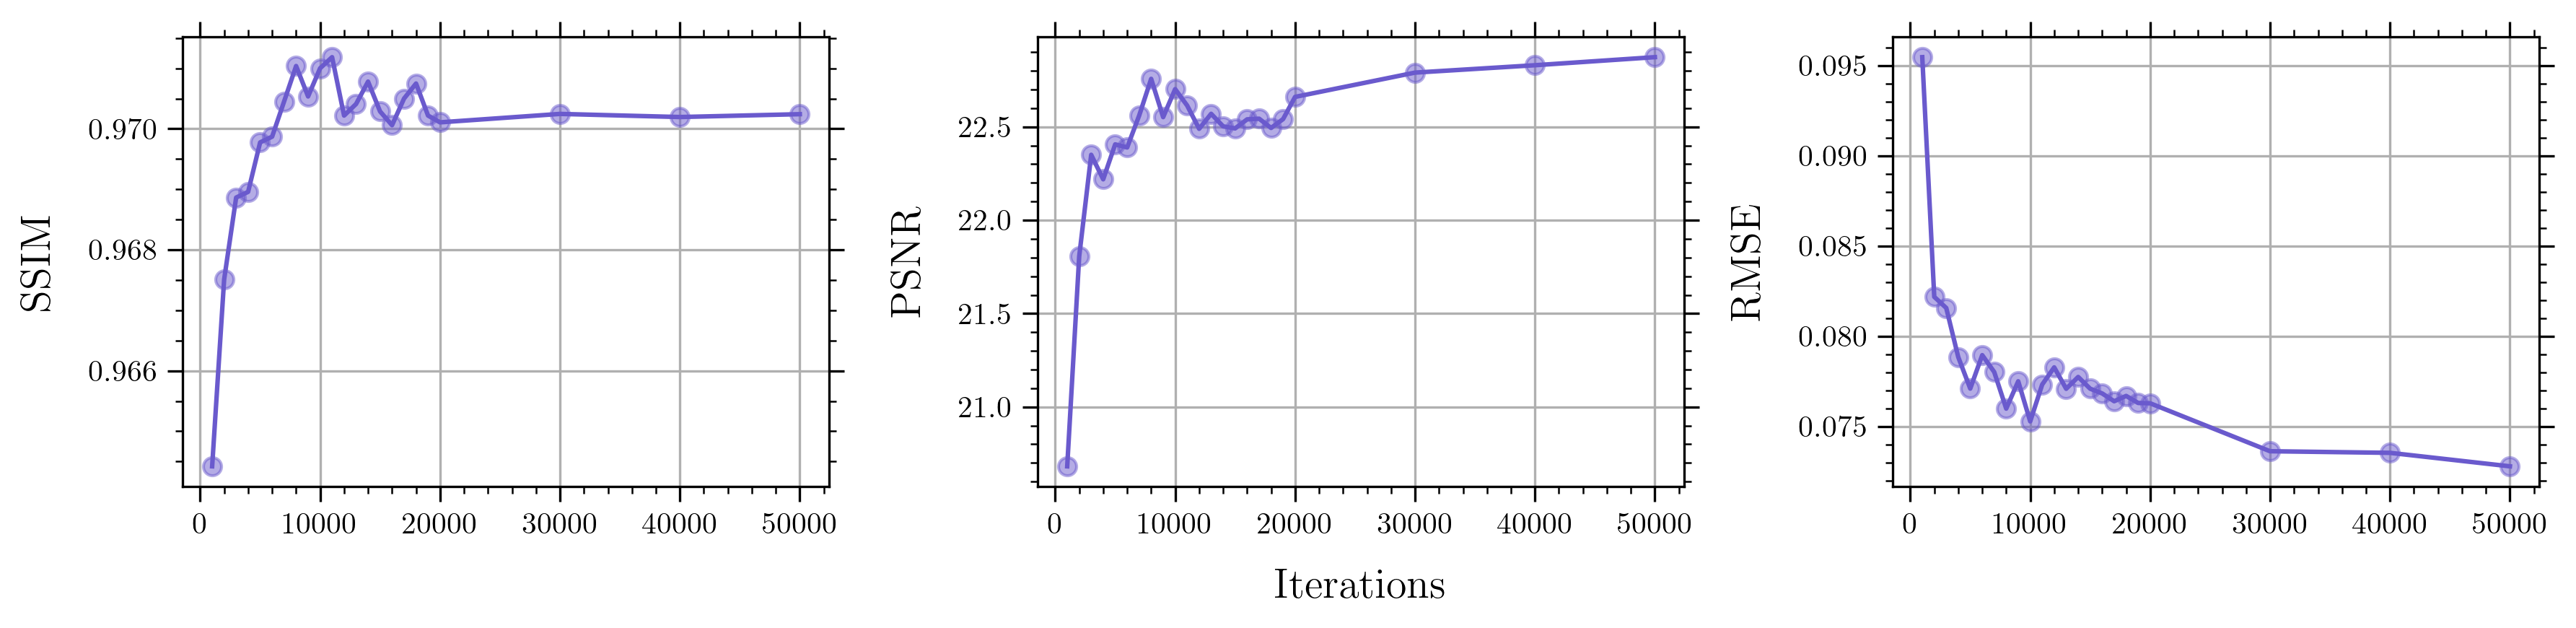

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
metrics = pd.read_csv(f"results/{model}/{model}_metrics.csv")
x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
sort = np.argsort(x)
x = x[sort]

for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    y = np.array([float(y) for y in metrics[name.lower()]])[sort]
    ax[i].plot(x, y, color='slateblue')
    ax[i].scatter(x, y, color='slateblue', alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig(f"results/{model}/{model}_metrics.png")

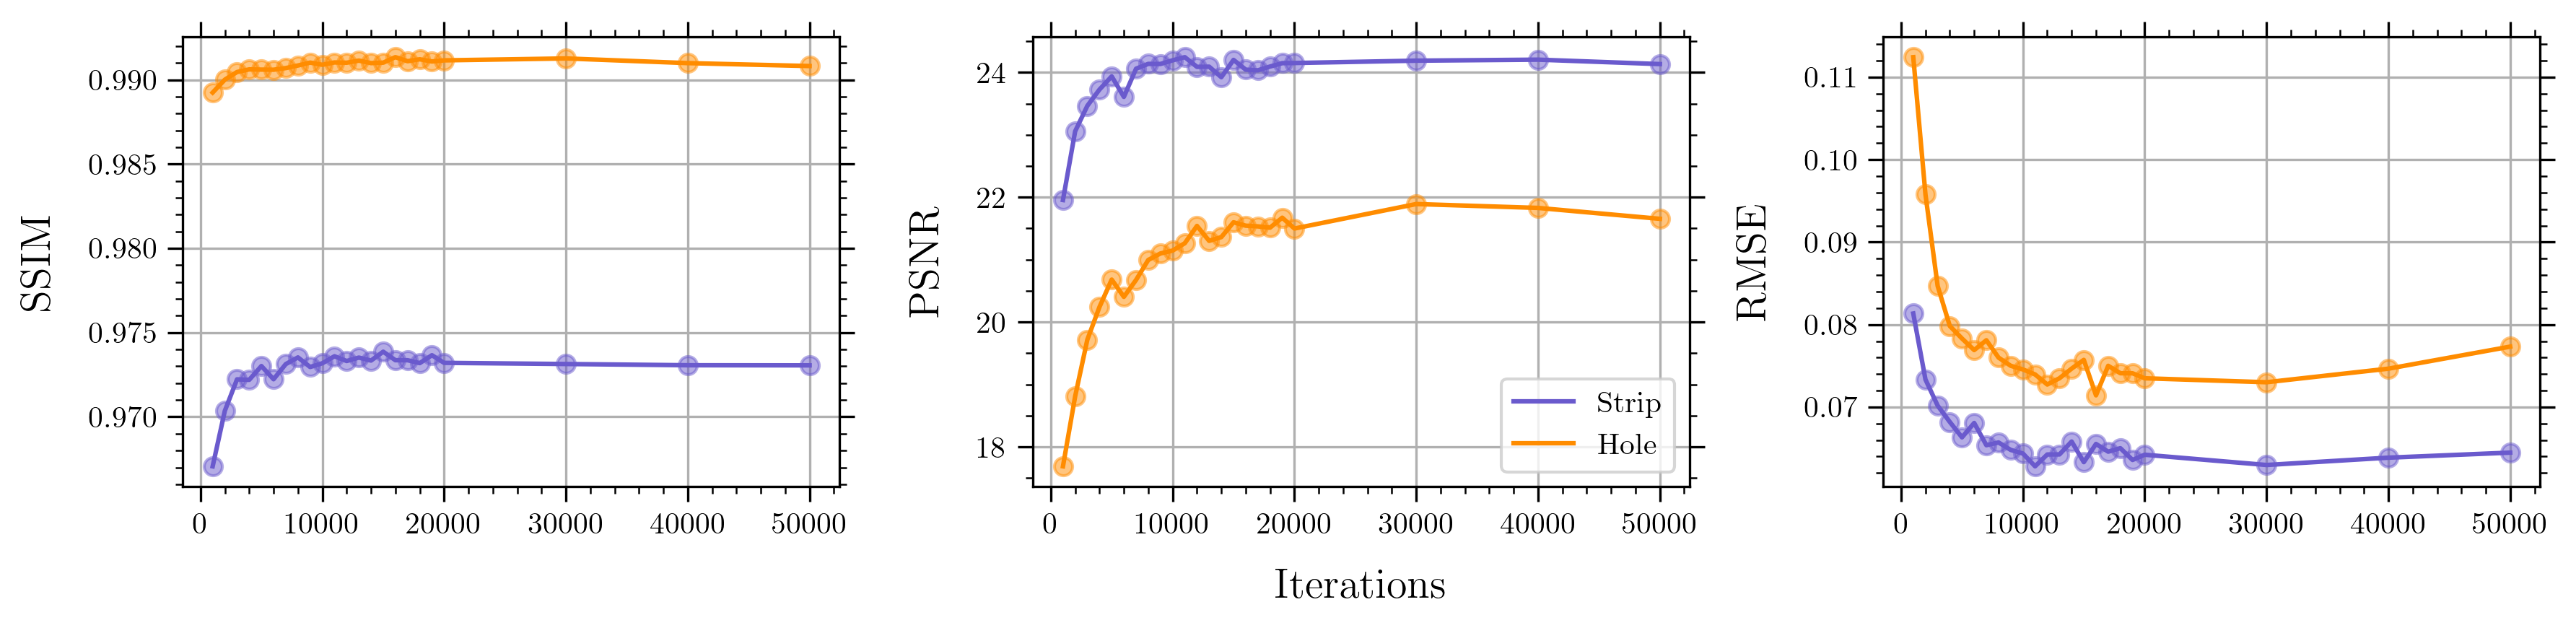

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
metrics = pd.read_csv(f"results/{model}/{model}_metrics.csv")
metrics_compare = pd.read_csv(f"results/{compare}/{compare}_metrics.csv")
x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
sort = np.argsort(x)
x = x[sort]
x_c = np.array([int(x.split("+")[0]) for x in metrics_compare['iters']])
sort_c = np.argsort(x_c)
x_c = x_c[sort]

for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    y = np.array([float(y) for y in metrics[name.lower()]])[sort]
    y_c = np.array([float(y) for y in metrics_compare[name.lower()]])[sort_c]
    ax[i].plot(x, y, color='slateblue', label="Strip")
    ax[i].scatter(x, y, color='slateblue', alpha=0.5)
    ax[i].plot(x_c, y_c, color='darkorange', label="Hole")
    ax[i].scatter(x_c, y_c, color='darkorange', alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
        ax[i].legend(loc='lower right')
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig(f"results/{model}_vs_{compare}.png")

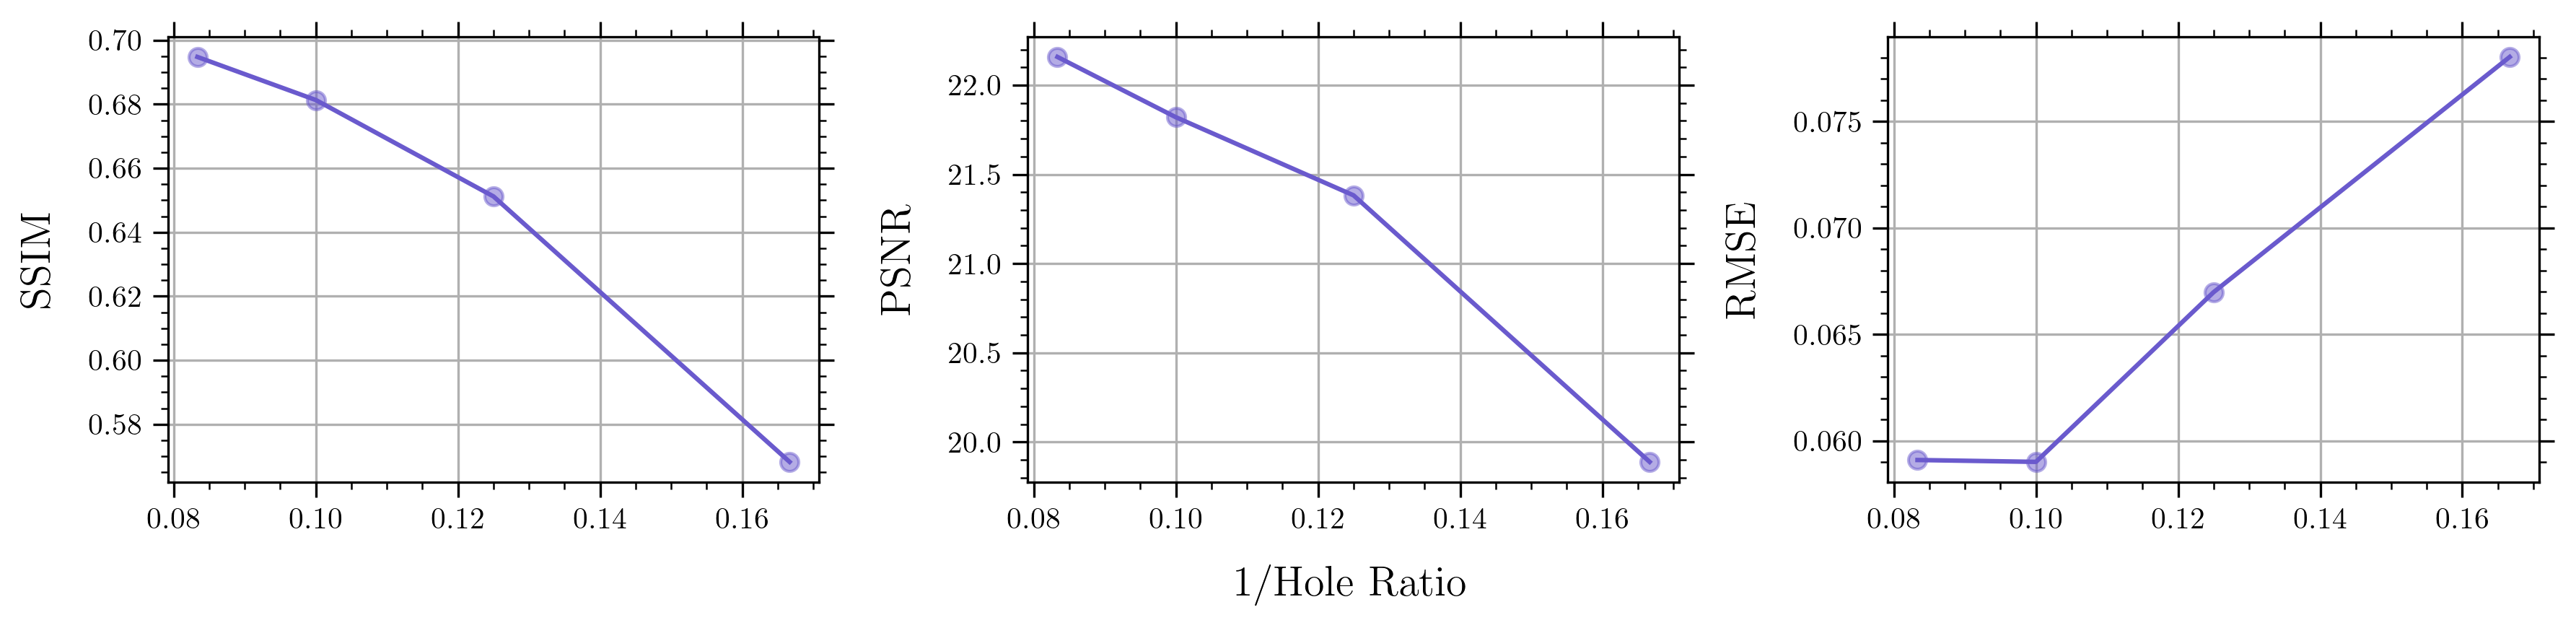

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
metrics = pd.read_csv(f"results/hole_ratio_vs_metrics.csv")
x = 1/metrics['ratio']
for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    y = np.array([float(y) for y in metrics[name.lower()]])
    ax[i].plot(x, y, color='slateblue')
    ax[i].scatter(x, y, color='slateblue', alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"1/Hole Ratio", labelpad=10, fontsize=14)
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig("results/hole_ratio_vs_metrics.png")